# Ejemplo: aplicación de los conceptos vistos hasta ley de Hooke.

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Abril 15, 2022 | Creando ejemplo |

Durante la prueba de un elemento de máquina, las deformaciones determinadas mediante el uso de la roseta de deformaciones que se muestra en la figura, son: 

\begin{align*}
\varepsilon_1 &= -93.1x10^{-6} in./in. \\
\varepsilon_2 &= 385x10^{-6} in./in. \\
\varepsilon_3 &= 210x10^{-6} in./in.
\end{align*}

Suponga que el sólido está hecho de acero, que un módulo de Young $E = 200GPa$ y un coeficiente de Poisson $\nu = 0.3$. Calcule:

1. El estado de deformaciones en el plano $xy$.
2. Las deformaciones principales y sus direcciones asociadas.
3. El círculo de Mohr de deformaciones.
4. El estado de esfuerzos en el plano $xy$ aplicando la Ley de Hooke generalizada para materiales isótropos.
5. Los esfuerzos principales y sus direcciones asociadas.
6. El círculo de Mohr de esfuerzos.
7. Verifique que las direcciones principales para el estado de esfuerzos y deformaciones coinciden.
8. Verifique todos los cálculos anteriores aplicando la Ley de Hooke simplificada para deformación plana.

<p align="center">
 <img width="600" height="350" src=https://drive.google.com/uc?id=1bsKEkgsQpBh-1glmrIDDgdVQXk2H7-GO
>
</p>



In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt 

# Para imprimir bonito
from IPython.display import Math
sp.init_printing()                         

def imprimir (texto, variable, unidad=False):
    if unidad:
        return Math(texto + rf'{sp.latex(variable)}' + unidad)
    else:
        return Math(texto + rf'{sp.latex(variable)}')

# Defino un tamaño de fuente para todos los gráficos de este cuaderno
plt.rcParams.update({'font.size': 10})

In [2]:
def grafica_circulo_mohr_2d(estado, pp, label):
    """Función para graficar el círculo de Mohr bidimensional según sea el label 
    asignado: "def" (deformación) o "esf" esfuerzos. el código sigue la 
    nomenclatura de esfuerzos.
    
    Variables:
    - estado <list> : [sx, sy, txy] estado de esfuerzos o deformaciones.
    - pp <list> : [s1, s2, tmax] valores propios asociados y 
                  esfuerzo cortante o deformación angualar matemática máxima.
    - label <str> : "def" o "esf".
    """

    # Se extraen las variables.
    sx, sy, txy = estado
    s1_xy, s2_xy, tau_max = pp
    
    # Discretizo el dominio en 100 puntos.
    tt = np.linspace(0, np.pi, 100)
        
    # Evalúo las ecuaciones que construyen el círculo para el estado dado. (nome)
    ssn_t = ( sx+sy )/2 + ( sx-sy )/2*np.cos( 2*tt ) + txy*np.sin( 2*tt )
    ttn_t = txy*np.cos( 2*tt ) - ( sx-sy )/2*np.sin( 2*tt ) 

    # Inicio el lienzo.
    fig, ax = plt.subplots()

    # Dibujo la recta que pasa por los puntos C y A.
    ax.plot((sy, sx), (-txy, txy), "--g")

    ax.plot(sy, -txy, "*r")  
    ax.plot(sx, txy,  "*r")  

    # Marco el centro de la circunferencia O.
    ax.plot((sx+sy)/2, 0, "*r")
    ax.text((sx+sy)/2, 0,  "O")

    # Dibujo la circunferencia.
    ax.plot(ssn_t, ttn_t, "-b")

    # Ubico los esfuerzos sx, sy 
    ax.plot(sx, 0, "*r")
    ax.plot(sy, 0, "*r")
    
    # Ubico los esfuerzos principales s1, s2 
    ax.plot(s1_xy, 0, "*r")
    ax.plot(s2_xy, 0, "*r")

    # Indico el esfuerzo cortante máximo.
    ax.plot((sx+sy)/2, tau_max, "*r")

    if label == "esf":
        # Etiquetas para los puntos.
        ax.text(sy, -txy*1.1, r"$(\sigma_y, -\tau_{xy} )$")  
        ax.text(sx, txy*0.95, r"$(\sigma_x, \tau_{xy} )$") 
        ax.text(sx, 0, r"$\sigma_x$")
        ax.text(sy, 0, r"$\sigma_y$")
        ax.text(s1_xy, 0, r"$\sigma_1$")
        ax.text(s2_xy, 0, r"$\sigma_2$")
        ax.text(0.8*(sx+sy)/2, 1*tau_max, r"$(\tau_{max})_{xy}$")
        # Nombre de los ejes.
        ax.set_xlabel("Esfuerzo normal " + r"$\sigma_n$" + "[Pa]" )
        ax.set_ylabel("Esfuerzo cortante " + r"$\tau_n$" + "[Pa]")
    elif label == "def":
        # Etiquetas para los puntos.
        ax.text(sy, -txy*1.1, r"$(\varepsilon_y, -\varepsilon_{xy})$")  
        ax.text(sx, txy*0.95, r"$(\varepsilon_x, \varepsilon_{xy})$")
        ax.text(sx, 0, r"$\varepsilon_x$")
        ax.text(sy, 0, r"$\varepsilon_y$")
        ax.text(s1_xy, 0, r"$\varepsilon_1$")
        ax.text(s2_xy, 0, r"$\varepsilon_2$")
        ax.text(0.8*(sx+sy)/2, 1*tau_max, r"$(\varepsilon_{max})_{xy}$")
        # Nombre de los ejes.
        ax.set_xlabel("Deformación normal " + r"$\varepsilon_{x'}$" )
        ax.set_ylabel("Deformación angular " + r"$\varepsilon_{x'y'}$" + "[rad]")
    else:
        raise Exception("Error en el el label.")
    
    # Configuro parámetros del lienzo.
    ax.grid(which='major', linestyle='-')
    ax.set_aspect('equal', adjustable='box')

    # Presento en pantalla el lienzo.
    plt.show()

## Información del problema


In [3]:
# Deformaciones longitudinales medidas por las galgas. eA = e1, eB = e2, eC = e3 
eA = -93.1e-6
eB = 385e-6
eC = 210e-6

# Ángulos de inclinación de las galgas medidos en radianes.
tA = 0  * np.pi/180
tB = 75 * np.pi/180
tC = -75* np.pi/180

# Módulo de young (E) y coeficiente de Poisson (nu)
E = 200e9
nu = 0.3

## 1. Estado de deformaciones

Aplicamos la ecuación $\varepsilon_{x'} = \varepsilon_x \cos^2(\theta) + \varepsilon_y \sin^2(\theta) + 2\varepsilon_{xy} \cos(\theta)\sin(\theta)$

Formando el siguiente sistema de ecuaciones:

\begin{align*}
\varepsilon_A &= \varepsilon_x \cos^2(\theta_A) + \varepsilon_y \sin^2(\theta_A) + 2\varepsilon_{xy} \cos(\theta_A)\sin(\theta_A) \\
\varepsilon_B &= \varepsilon_x \cos^2(\theta_B) + \varepsilon_y \sin^2(\theta_B) + 2\varepsilon_{xy} \cos(\theta_B)\sin(\theta_B) \\
\varepsilon_C &= \varepsilon_x \cos^2(\theta_C) + \varepsilon_y \sin^2(\theta_C) + 2\varepsilon_{xy} \cos(\theta_C)\sin(\theta_C)
\end{align*}

Pudiéndose formar un sistema matricial de la forma $\boldsymbol{b} = \boldsymbol{Ax}$.

**Observación:** Calcularemos el estado de deformaciones en el plano $xy$, por lo mismo, no hay deformaciones en el eje $z$, así que asumimos $\varepsilon_z = \varepsilon_{xz} = \varepsilon_{yz} = 0$.

In [4]:
# Definimos la matriz de coeficientes A.
A = np.array([
    [np.cos(tA)**2, np.sin(tA)**2, 2*np.sin(tA)*np.cos(tA)],
    [np.cos(tB)**2, np.sin(tB)**2, 2*np.sin(tB)*np.cos(tB)],
    [np.cos(tC)**2, np.sin(tC)**2, 2*np.sin(tC)*np.cos(tC)]
])

# Definimos el vector b
b = np.array([eA, eB, eC]).T

# Solucionamos el problema Ax = b -> x = inv(A)b
x = np.linalg.inv(A) @ b
x

array([-9.31000000e-05,  3.25543818e-04,  1.75000000e-04])

In [5]:
# Asigno los resultados
ex, ey, exy = x

In [6]:
imprimir(r"\varepsilon_x = ", ex)

<IPython.core.display.Math object>

In [7]:
imprimir(r"\varepsilon_y = ", ey)

<IPython.core.display.Math object>

In [8]:
imprimir(r"\varepsilon_{xy} = ", exy, "rad")

<IPython.core.display.Math object>

In [9]:
# Definimos las deformaciones nulas.
ez, exz, eyz = 0, 0, 0

# Construimos el tensor de deformaciones infinitesimales 
# (sp solo para verlo bonito)
epsilon = sp.Matrix([
    [ex, exy, exz],
    [exy, ey, eyz],
    [exz, eyz, ez]
])

imprimir(r"\underline{\underline{\boldsymbol{\varepsilon}}}=", epsilon)

<IPython.core.display.Math object>

## 2. Deformaciones principales

In [10]:
# Construimos el tensor de deformaciones inifinitesimales como numpy para 
# calcular.
epsilon = np.array([
    [ex, exy, exz],
    [exy, ey, eyz],
    [exz, eyz, ez]
])

# Calculamos los valores y vectores propios de epsilon
valp, vecp = np.linalg.eigh(epsilon)

# Asignamos
e3, e2, e1 = valp
n3d, n2d, n1d = vecp.T

In [11]:
imprimir(r"\varepsilon_1 = ", e1)

<IPython.core.display.Math object>

In [12]:
imprimir(r"\varepsilon_2 = ", e2)

<IPython.core.display.Math object>

In [13]:
imprimir(r"\varepsilon_3 = ", e3)

<IPython.core.display.Math object>

In [14]:
imprimir(r"\hat{n}_{1, def} = ", n1d)

<IPython.core.display.Math object>

In [15]:
imprimir(r"\hat{n}_{2, def} = ", n2d)

<IPython.core.display.Math object>

In [16]:
imprimir(r"\hat{n}_{3, def} = ", n3d)

<IPython.core.display.Math object>

In [17]:
# La deformación angualar máxima:
exy_max = (e1-e3)/2

imprimir(r"(\varepsilon_{xy})_{max} = ", exy_max, "rad")

<IPython.core.display.Math object>

## 3. Círculo de Mohr de deformaciones

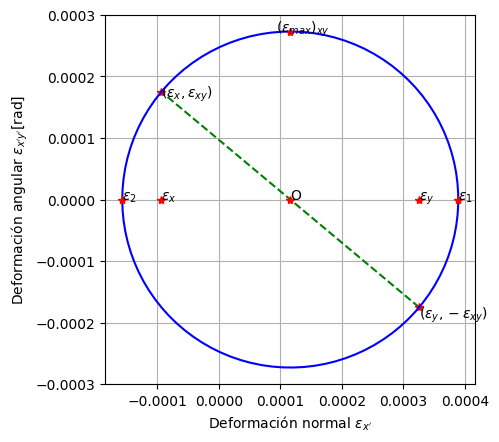

In [18]:
grafica_circulo_mohr_2d([ex, ey, exy], [e1, e3, exy_max], label="def")

## 4. Estado de esfuerzos

Aplicamos la Ley de Hooke:

\begin{align*}
\sigma_x &= \lambda e + 2G\varepsilon_x \\
\sigma_y &= \lambda e + 2G\varepsilon_y \\
\sigma_z &= \lambda e + 2G\varepsilon_z \\
\tau_{xy} &= 2G  \varepsilon_{xy} \\
\tau_{xz} &= 2G  \varepsilon_{xz} \\
\tau_{yz} &= 2G  \varepsilon_{yz} 
\end{align*}

Con $\lambda = \frac{\nu E}{(1+\nu)(1-2\nu)}$ la constante de Lamé y $e = \varepsilon_x + \varepsilon_y + \varepsilon_z$ la dilatación cúbica. 

Veamos que por el cálculo anterior, $\varepsilon_z = \varepsilon_{xz} = \varepsilon_{yz} = 0$ (esto es un estado de deformación plana).

In [19]:
# Definimos la constante de Lamé.
lame = (nu*E)/((1+nu)*(1-2*nu))

# Definimos la dilatación cúbica (sz = 0)
e = ex + ey

# Definimos el módulo de corte G
G = E/(2*(1+nu))

# Aplicamos la Ley de Hooke
sx = lame*e + 2*G*ex
sy = lame*e + 2*G*ey
sz = lame*e + 2*G*ez
txy = G*2*exy
txz = G*2*exz
tyz = G*2*eyz

In [20]:
imprimir(r"\sigma_x= ", round(sx/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [21]:
imprimir(r"\sigma_y= ", round(sy/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [22]:
imprimir(r"\sigma_z= ", round(sz/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [23]:
imprimir(r"\tau_{xy}= ", round(txy/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [24]:
imprimir(r"\tau_{xz}= ", round(txz/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [25]:
imprimir(r"\tau_{yz}= ", round(tyz/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [26]:
# Construimos el tensor de esfuerzos infinitesimales 
# (sp solo para verlo bonito)
sigma = sp.Matrix([
    [sx, txy, txz],
    [txy, sy, tyz],
    [txz, tyz, sz]
])

imprimir(r"\underline{\underline{\boldsymbol{\sigma}}}=", sigma)

<IPython.core.display.Math object>

## 5. Esfuerzos y deformaciones principales

In [27]:
# Construimos el tensor de esfuerzos inifinitesimales como numpy para 
# calcular.
sigma = np.array([
    [sx, txy, txz],
    [txy, sy, tyz],
    [txz, tyz, sz]
])

# Calculamos los valores y vectores propios de epsilon
valp, vecp = np.linalg.eigh(sigma)

# Asignamos
s3, s2, s1 = valp
n3s, n2s, n1s = vecp.T

In [28]:
imprimir(r"\sigma_1 = ", round(s1/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [29]:
imprimir(r"\sigma_2 = ", round(s2/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [30]:
imprimir(r"\sigma_3 = ", round(s3/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [31]:
imprimir(r"\hat{n}_{1, esf} = ", n1s)

<IPython.core.display.Math object>

In [32]:
imprimir(r"\hat{n}_{2, esf} = ", n2s)

<IPython.core.display.Math object>

In [33]:
imprimir(r"\hat{n}_{3, esf} = ", n3s)

<IPython.core.display.Math object>

In [34]:
# Esfuerzo cortante máximo:
txy_max = (s1-s3)/2

imprimir(r"(\tau_{xy})_{max} = ", round(txy_max/1000000, 2), "MPa")

<IPython.core.display.Math object>

## 6. Círculo de Mohr de esfuerzos

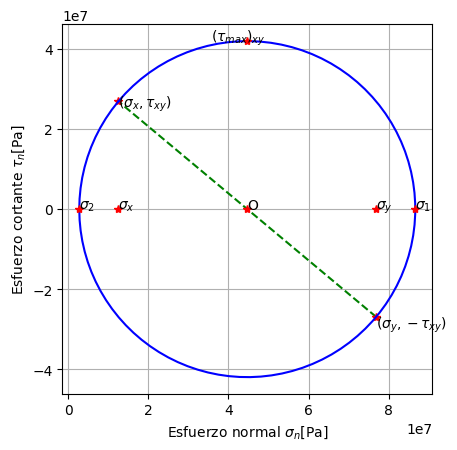

In [35]:
grafica_circulo_mohr_2d([sx, sy, txy], [s1, s3, txy_max], label="esf")

## 7. Verificación de la ortogonaliad de las direcciones principales de esfuerzos y deformaciones

Según la teoría, para un material elástico, lineal e isótropo, las direcciones principales para los esfuerzos y las deformaciones principales deben coincidir.

In [36]:
n1d - n1s

array([0., 0., 0.])

In [37]:
n2d - n2s

array([0., 0., 0.])

In [38]:
n3d - n3s

array([0., 0., 0.])

**Obervación:** vea que el círculo de Mohr de esfuerzos y deformaciones tienen la misma forma, a pesar de que están en ordenes de magnitudes diferentes. Esto indica también la igualdad de las direcciones principales.

## 8. Aplicación de la simplificación de deformación plana.

Vamos a aplicar la simplificación para reducir el problema tridimensional anterior uno bidimensional como **deformación plana**, para el cual $\varepsilon_z = \varepsilon_{xz} = \varepsilon_{yz} = 0$.

### Aplicación de la Ley de Hooke para deformación plana

La Ley de Hooke para la simplificación de deformación plana es:

\begin{align*}
\sigma_x &= \frac{E}{(1+\nu)(1-2\nu)}((1-\nu)\varepsilon_x + \nu\varepsilon_y) \\ 
\sigma_y &= \frac{E}{(1+\nu)(1-2\nu)}(\nu\varepsilon_x + (1-\nu)\varepsilon_y) \\
\sigma_z &= \frac{\nu E}{(1+\nu)(1-2\nu)}(\varepsilon_x + \varepsilon_y) \\
\tau_{xy} &= G 2\varepsilon_{xy}
\end{align*}

Observe que los resultados son iguales a los calculados al aplicar la Ley de Hooke general para materiales isótropos (tridimensional).

In [39]:
sx = E/((1+nu)*(1-2*nu)) * ((1-nu)*ex + nu*ey)
sy = E/((1+nu)*(1-2*nu)) * (nu*ex + (1-nu)*ey)
sz = E/((1+nu)*(1-2*nu)) * nu*(ex + ey)
txy = G*2*exy

In [40]:
imprimir(r"\sigma_x= ", round(sx/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [41]:
imprimir(r"\sigma_y= ", round(sy/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [42]:
imprimir(r"\sigma_z= ", round(sz/1000000, 2), "MPa")

<IPython.core.display.Math object>

In [43]:
imprimir(r"\tau_{xy} = ", round(txy/1000000, 2), "MPa")

<IPython.core.display.Math object>